In [31]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from LSTMModel import LSTMModel

In [32]:
mem_cell_ct = 100
x_dim = 549

In [33]:
# data = pd.read_csv('train_minimal.csv')
# data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
data = pd.read_csv('../src/train_1.csv').fillna(0)
data = data.sample(n=200, random_state=1)
page = data['Page']
data = data.drop('Page',axis = 1)

In [35]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
model = LSTMModel(mem_cell_ct, x_dim)

In [38]:
kf = KFold(n_splits=5)

In [39]:
count = 1
train_errors = []
test_errors = []
for train_index, test_index in kf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    print("Split: ", count)
    count += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train, 10)
    print("Train Evaluation: ")
    temp = model.evaluate(y_train, model.y_pred)
    train_errors.append(temp)
    model.test(X_test, y_test)
    print("Test Evaluation: ")
    temp = model.evaluate(y_test, model.y_test_pred)
    test_errors.append(temp)

Split:  1
Train Evaluation: 
Mean Squared Error:  24800730.21875
Explained Variance Score:  -0.00035064496988024274
Mean Squared Log Error:  6.6909661110451335
Max Residual Error:  58421.0
R2 Score:  -0.040159708364703395
Mean Absolute Error:  1029.79375
Test Evaluation: 
Mean Squared Error:  28935747.025
Explained Variance Score:  -0.0009074940540374499
Mean Squared Log Error:  12.784874239415183
Max Residual Error:  26014.0
R2 Score:  -0.14802333870121998
Mean Absolute Error:  1934.475
Split:  2
Train Evaluation: 
Mean Squared Error:  31184163.1875
Explained Variance Score:  -0.0016243573520091648
Mean Squared Log Error:  7.610124805107203
Max Residual Error:  58420.0
R2 Score:  -0.05720174755213425
Mean Absolute Error:  1337.8125
Test Evaluation: 
Mean Squared Error:  3395620.4
Explained Variance Score:  -0.0026541061826763634
Mean Squared Log Error:  9.084130507612498
Max Residual Error:  9999.0
R2 Score:  -0.17069822176976146
Mean Absolute Error:  702.25
Split:  3
Train Evaluation

In [65]:
#plt.plot([x["msle"] for x in train_errors])
preds = model.predictForNDays(X_test, 10)

In [29]:
# plt.plot([x["msle"] for x in test_errors])

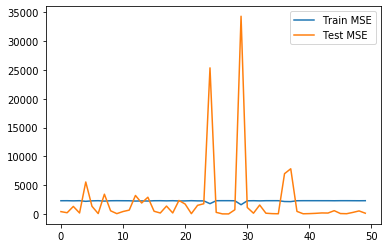

In [30]:
plt.plot([x["mse"] for x in train_errors], label='Train MSE')
plt.plot([x["mse"] for x in test_errors], label='Test MSE')
plt.legend()

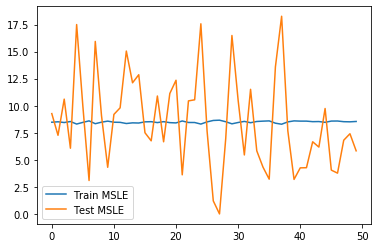

In [31]:
plt.plot([x["msle"] for x in train_errors], label='Train MSLE')
plt.plot([x["msle"] for x in test_errors], label='Test MSLE')
plt.legend()

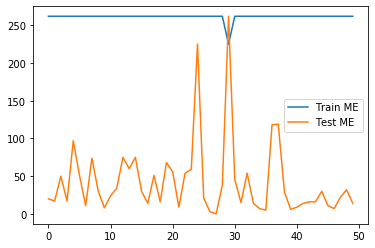

In [32]:
plt.plot([x["me"] for x in train_errors], label='Train ME')
plt.plot([x["me"] for x in test_errors], label='Test ME')
plt.legend()

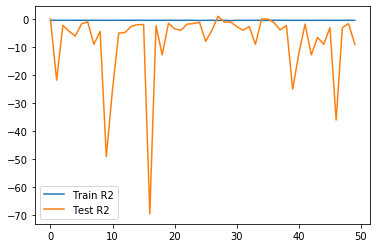

In [33]:
plt.plot([x["r2"] for x in train_errors], label='Train R2')
plt.plot([x["r2"] for x in test_errors], label='Test R2')
plt.legend()

In [66]:
preds

,549,550,551,552,553,554,555,556,557,558
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
4,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
5,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
6,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
7,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
8,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
9,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [67]:
df = pd.DataFrame(X_test)

IndexError: index 155 is out of bounds for axis 0 with size 40

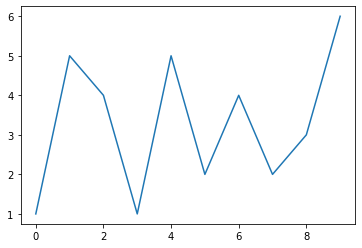

In [69]:
plt.plot(df.values[38][-10:])

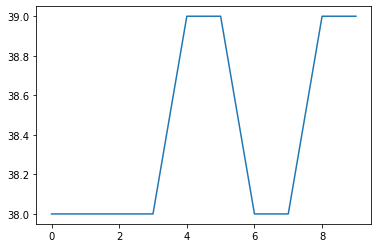

In [70]:
plt.plot(preds.values[38])

In [63]:
df.loc[155]

0       2.0
1       4.0
2       3.0
3       3.0
4       2.0
       ... 
544    20.0
545     7.0
546    12.0
547     6.0
548    15.0
Name: 155, Length: 549, dtype: float64

In [64]:
preds.loc[155]

549    151.0
550    155.0
551    154.0
552    154.0
553    152.0
554    155.0
555    155.0
556    154.0
557    154.0
558    155.0
Name: 155, dtype: float64